In [2]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from PIL import Image # open images
import model as m 


In [3]:
def show(image)->None:
    """Simple display of an image."""
    if isinstance(image, Image.Image):
        image = torchvision.transforms.functional.to_pil_image(image)
    image = torchvision.transforms.functional.convert_image_dtype(image, torch.uint8)

    fig, ax = plt.subplots()
    ax.imshow(image.permute(1, 2, 0).numpy())
    fig.tight_layout()

In [4]:
def show_wct(model,content,style,alpha:float):
    """Show the output of a specified model and the WCT transformation. 
        The function will output the chosen content, the chosen style, 
        the plain reconstruction of the content by the model and the 
        stylized image obtained applying the WCT transformation.
        
        Parameters
        --------
        - model: a trained model from the class UCT.
        - content: image to transfer the style to.
        - style: image from which import the style. 
        - alpha: blend between stylized image and original image before model reconstruction. Should be in the range [0,1]"""
    show(content)
    show(style)
    enc = model(content.reshape([1,3,224,224]))
    wct = model.WCT(content,style,alpha)
    show(enc[0])
    show(wct)

In [5]:
def show_wct_mul(content,style,alpha,active:list =[1,1,1,1,1]):
    """Implements the WCT-Multilayer transformation
        The function will output the chosen content, the chosen style,
        and the output of the WCT_Multilayer pipeline.
        Parameters
        --------
        - content: image to transfer the style to.
        - style: image from which import the style.
        - alpha: blend between stylized image and original image before model reconstruction. A scalar (in [0,1])
        will be replicated in every model, while by giving a list of 5 floats one can customize the alphas for each autoencoder. 
        (starting from the biggest one to the smallest).
        - active: Choose to turn off one or more autoencoders. A list of 0-1 values is expected. Ex. [0,0,0,1,1] will only use the two smallest autoencoders."""
    show(content)
    show(style)
    if type(alpha) == float or  type(alpha) == int :
        tmp = np.repeat(alpha,5) 
        alpha = tmp.copy()
    wct = content.clone().detach()
    if(active[0]):
        wct = model5.WCT(wct,style,alpha[0])
    if(active[1]):
        wct = model4.WCT(wct,style,alpha[1])
    if(active[2]):
        wct = model3.WCT(wct,style,alpha[2])
    if(active[3]):
        wct = model2.WCT(wct,style,alpha[3])
    if(active[4]):    
        wct = model.WCT(wct,style, alpha[4])
    show(wct)

In [20]:
model = m.UST_Net(level = 1)
model2 = m.UST_Net(level = 2)
model3 = m.UST_Net(level=3)
model4 = m.UST_Net(level=4)
model5 = m.UST_Net(level=5)
model.load_state_dict(torch.load(r"./parameters/parameters_1"))
model2.load_state_dict(torch.load(r"./parameters/parameters_2"))
model3.load_state_dict(torch.load(r"./parameters/parameters_3"))
model4.load_state_dict(torch.load(r"./parameters/parameters_4"))
model5.load_state_dict(torch.load(r"./parameters/parameters_5"))

<All keys matched successfully>

In [32]:
data_transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize(size=(256,256)),
    torchvision.transforms.CenterCrop(size=(224,224)),
    torchvision.transforms.ToTensor()
    ])

img = Image.open("images/goldengate.jpg")
style = Image.open("images/propellerdancersea.jpg")
img = data_transform(img)
style = data_transform(style)

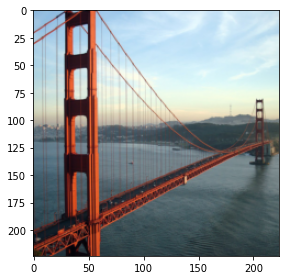

In [33]:
show(img)

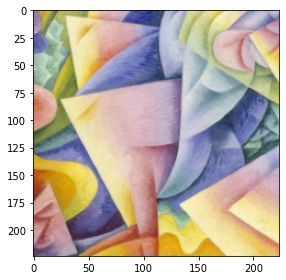

In [34]:
show(style)

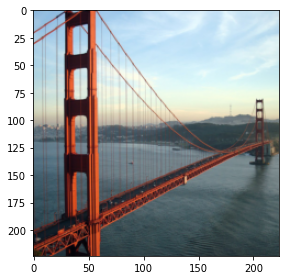

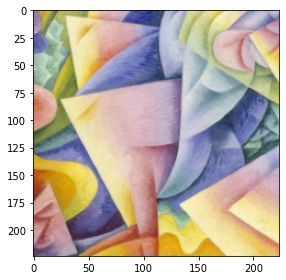

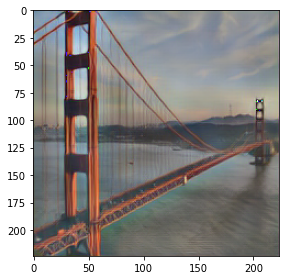

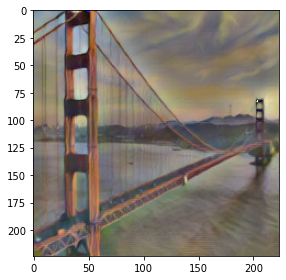

In [37]:
show_wct(model3,img,style,.6)

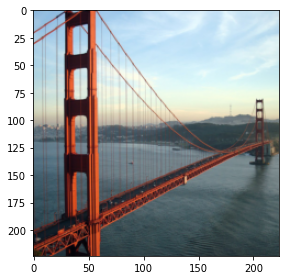

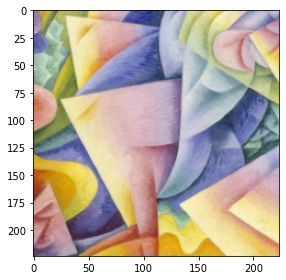

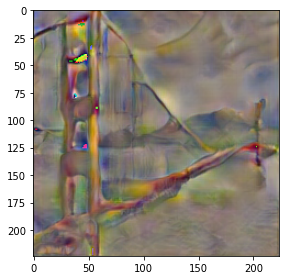

In [39]:
show_wct_mul(img,style,.2)